In [1]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
import joblib
from sklearn.model_selection import GridSearchCV
import cv2
import seaborn as sns
import time
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [3]:
folder_path = f"Dataset/"
os.makedirs(folder_path, exist_ok=True)

# define path
confusion_image_path = os.path.join(folder_path, 'confusion matrix.png')
classification_file_path = os.path.join(folder_path, 'classification_report.txt')
model_file_path = os.path.join(folder_path, "svm_model.pkl")

# Path dataset
dataset_dir = "Dataset/"
train_dir = os.path.join(dataset_dir, "train/train")
test_dir = os.path.join(dataset_dir, "test1")

In [4]:
# load data, preprocessing data, and labeling
# dog = 1, cat = 0
train_images = os.listdir(train_dir)
features = []
labels = []
image_size = (50, 50)

# Proses train images
for image in tqdm(train_images, desc="Processing Train Images"):
    if image[0:3] == 'cat' :
        label = 0
    else :
        label = 1
    image_read = cv2.imread(train_dir+"/"+image)
    image_resized = cv2.resize(image_read, image_size)
    image_normalized = image_resized / 255.0
    image_flatten = image_normalized.flatten()
    features.append(image_flatten)
    labels.append(label)

Processing Train Images: 100%|██████████████████████████████████████████████████| 10001/10001 [00:23<00:00, 421.42it/s]


In [5]:
features = np.asarray(features)
labels = np.asarray(labels)

# train test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, random_state=42)

In [5]:
# PCA, SVM, & Pipeline
n_components = 0.8
pca = PCA(n_components=n_components)
svm = SVC()
pca = PCA(n_components=n_components, random_state=42)
pipeline = Pipeline([
    ('pca', pca),
    ('svm', svm)
])

param_grid = {
    'pca__n_components': [2, 1, 0.9],
    'svm__kernel': ['rbf', 'poly', 'sigmoid'],
}

In [6]:
# Initialize and train SVM classifier
from sklearn import svm
print("Training SVM classifier...")
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
print("SVM classifier trained.")

Training SVM classifier...
SVM classifier trained.


In [7]:
# Evaluation on test dataset
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6701649175412294


In [8]:
y_pred = clf.predict(X_test)

# classification report
target_names = ['Cat', 'Dog']
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", classification_rep)

with open(classification_file_path, 'w') as file:
    file.write(classification_rep)

Classification Report:
               precision    recall  f1-score   support

         Cat       0.68      0.65      0.66      1012
         Dog       0.66      0.70      0.68       989

    accuracy                           0.67      2001
   macro avg       0.67      0.67      0.67      2001
weighted avg       0.67      0.67      0.67      2001



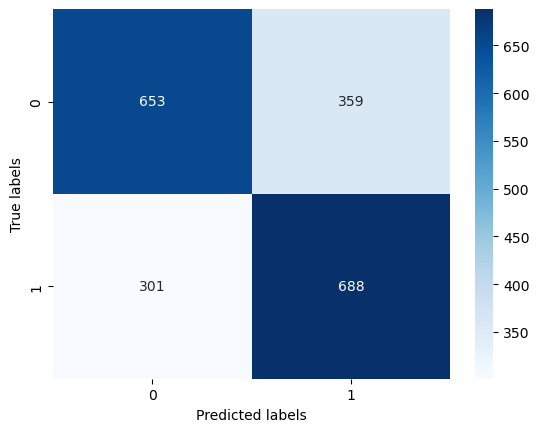

In [9]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig(confusion_image_path)
plt.show()